In [370]:
import numpy as np
np.random.seed(42)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [371]:
dataset = load_breast_cancer()

X = dataset.data
y = dataset.target

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

#### Exercise 1: Find the number of components to explain 90% of the variance and apply it to the scaled dataset, in order to get a reduced dataset

In [372]:
n_components = 1
x_reduced = np.array([])
required_explained_variance = 90/100 # = 90%
for n in range(1, 10):
    pca = PCA(n_components=n, copy=True)
    pca.fit(x_scaled)
    if sum(pca.explained_variance_ratio_) >= required_explained_variance:
        n_components = n
        x_reduced = pca.transform(x_scaled)
        break

print(n_components)
print(x_reduced)

7
[[ 9.19283683  1.94858307 -1.12316616 ... -1.19511012  1.41142444
   2.15936904]
 [ 2.3878018  -3.76817174 -0.52929269 ...  0.62177498  0.02865631
   0.01335786]
 [ 5.73389628 -1.0751738  -0.55174759 ... -0.1770859   0.5414521
  -0.66816696]
 ...
 [ 1.25617928 -1.90229671  0.56273053 ...  1.80999133 -0.53444725
  -0.19275929]
 [10.37479406  1.67201011 -1.87702933 ... -0.03374193  0.56793642
   0.22307965]
 [-5.4752433  -0.67063679  1.49044308 ... -0.18470331  1.61783734
   1.69895095]]


#### Exercise 3: Split the reduced dataset into a training and a testing dataset

In [373]:
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.3)

#### Exercise 4: Apply the K-Nearest-Neighbors Classifier to the reduced dataset

In [374]:
n_neighbors = 1
for n in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    if 0.9 <= score <= 0.95:
        n_neighbors = n
        break
    if n == 9 and n_neighbors == 1: # last case (default)
        n_neighbors = 3
        break

#### Exercise 4.a: Plot the result

In [375]:
def plot_dataset(
        x_train: np.ndarray,
        y_train: np.ndarray,
        x_test: np.ndarray,
        y_test: np.ndarray,
        n_neighbors: int,
        n_components: int
):
    colors = ["red", "blue"]
    for index, point in enumerate(x_test):
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        score = clf.score(x_test, y_test)

        is_accurate = y_pred[index] == y_test[index]
        if is_accurate:
            plt.scatter(point[0], point[1], color=colors[y_pred[index]])
        else:
            plt.scatter(point[0], point[1], color=colors[y_pred[index]], marker="*")
        plt.title(f"Score: {score*100:.4}%, Dimensions: {n_components} Neighbors: {n_neighbors}")
    plt.show()

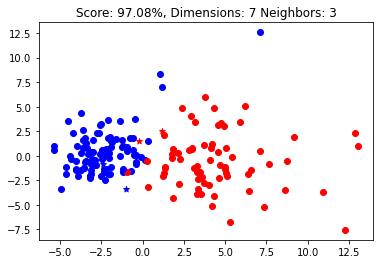

In [376]:
plot_dataset(x_train, y_train, x_test, y_test, n_neighbors, n_components)

#### Exercise 5: Apply the K-Nearest-Neighbor Classifier to the scaled dataset

In [377]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [378]:
n_neighbors = 1
for n in range(1, 10):
    clf = KNeighborsClassifier(n)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    if 0.9 <= score <= 0.95:
        n_neighbors = n
        break
    if n == 9 and n_neighbors == 1:
        n_neighbors = 3
        break

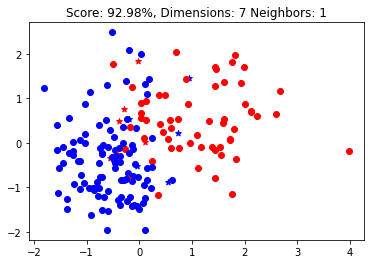

In [379]:
plot_dataset(x_train, y_train, x_test, y_test, n_neighbors, n_components)